In [1]:
import pandas as pd
import logging
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data set https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [2]:
# Configure logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    handlers=[logging.FileHandler("file_loader.log"), logging.StreamHandler()])

def load_csv(file_path):
    try:
        if not os.path.exists(file_path):
            logging.error(f"File not found: {file_path}")
            return None
        
        logging.info(f"Loading file: {file_path}")
        df = pd.read_csv(file_path)
        logging.info(f"File loaded successfully: {file_path}")
        return df
    
    except pd.errors.EmptyDataError:
        logging.error(f"No data: File is empty - {file_path}")
    
    except pd.errors.ParserError:
        logging.error(f"Parsing error: File could not be parsed - {file_path}")
    
    except Exception as e:
        logging.error(f"An error occurred: {e}")
    
    return None



In [3]:
data=load_csv(r"C:\Users\verma\OneDrive\Desktop\Data-Machine-learning-2024\water_potability.csv")

2024-06-01 10:45:19,030 - INFO - Loading file: C:\Users\verma\OneDrive\Desktop\Data-Machine-learning-2024\water_potability.csv
2024-06-01 10:45:19,068 - INFO - File loaded successfully: C:\Users\verma\OneDrive\Desktop\Data-Machine-learning-2024\water_potability.csv


In [4]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### data_quality_check

In [5]:
def data_quality_check(df):
    # Total samples
    total_samples = len(df)
    # Total features
    total_features = df.shape[1]
    # Missing values
    missing_values = df.isnull().sum()
    total_missing_values = missing_values.sum()
    # Percentage of missing values per feature
    missing_percentage = (missing_values / total_samples) * 100
    # Data types of each feature
    data_types = df.dtypes
    # Summary DataFrame
    summary_df = pd.DataFrame({
        'Total Samples': [total_samples],
        'Total Features': [total_features],
        'Total Missing Values': [total_missing_values],
        'Features': [df.columns.tolist()],
        'Missing Values per Feature': [missing_values.tolist()],
        'Missing Percentage per Feature': [missing_percentage.tolist()],
        'Data Types': [data_types.tolist()]
    })
    
    return summary_df

In [6]:
 summary_df=data_quality_check(data)

In [7]:
summary_df

,Total Samples,Total Features,Total Missing Values,Features,Missing Values per Feature,Missing Percentage per Feature,Data Types
0,3276,10,1434,"[ph, Hardness, Solids, Chloramines, Sulfate, C...","[491, 0, 0, 0, 781, 0, 0, 162, 0, 0]","[14.987789987789988, 0.0, 0.0, 0.0, 23.8400488...","[float64, float64, float64, float64, float64, ..."


In [8]:
def generate_eda_graph(df, column, analysis_type):
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")
    
    if analysis_type == 'outlier':
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f'Outlier Analysis for {column}')
        plt.show()
        
    elif analysis_type == 'unique':
        unique_values = df[column].nunique()
        total_values = len(df[column])
        unique_percentage = (unique_values / total_values) * 100
        
        print(f"Total Unique Values in '{column}': {unique_values}")
        print(f"Percentage of Unique Values in '{column}': {unique_percentage:.2f}%")
        
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column].value_counts(), kde=False, bins=30)
        plt.title(f'Unique Value Distribution for {column}')
        plt.xlabel('Value Counts')
        plt.ylabel('Frequency')
        plt.show()
    
    elif analysis_type == 'distribution':
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Distribution Analysis for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    
    elif analysis_type == 'missing':
        missing_values = df[column].isnull().sum()
        total_values = len(df[column])
        missing_percentage = (missing_values / total_values) * 100
        
        print(f"Total Missing Values in '{column}': {missing_values}")
        print(f"Percentage of Missing Values in '{column}': {missing_percentage:.2f}%")
        
        plt.figure(figsize=(10, 5))
        sns.heatmap(df[[column]].isnull(), cbar=False, cmap='viridis')
        plt.title(f'Missing Values Heatmap for {column}')
        plt.show()
    
    else:
        raise ValueError(f"Unsupported analysis type '{analysis_type}'. Supported types: 'outlier', 'unique', 'distribution', 'missing'.")

In [13]:
data=data
column="Hardness"
analysis_type="distribution"

C:\Users\verma\anaconda3\envs\mlops\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\verma\anaconda3\envs\mlops\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


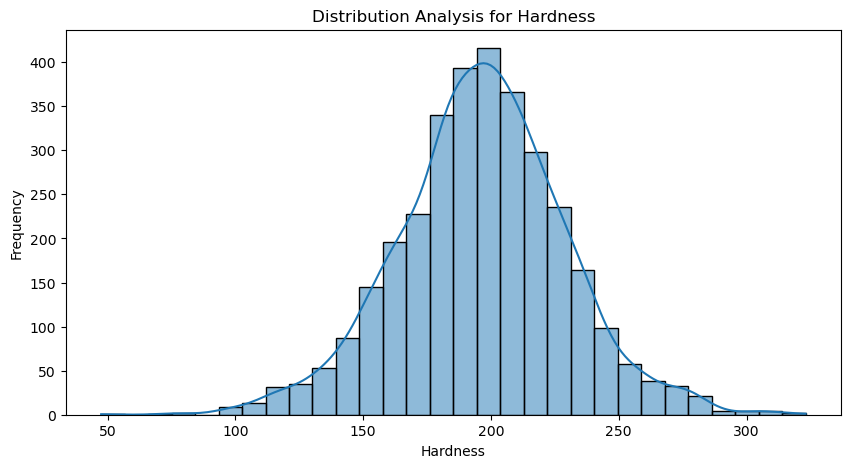

In [14]:
generate_eda_graph(data, column, analysis_type)

## Data setup

In [15]:
data.head(1)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.99097,2.963135,0


In [16]:
def check_and_handle_missing_values(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    total_missing = missing_values.sum()
    
    if total_missing > 0:
        # Print details of missing values
        print("Missing Values Details:")
        print(missing_values[missing_values > 0])
        print(f"\nTotal missing values: {total_missing}")
        print(f"Percentage of missing values: {total_missing / df.size * 100:.2f}%")
        
        # Drop rows with missing values
        cleaned_df = df.dropna()
        print("\nRows with missing values have been dropped.")
    else:
        print("No missing values found.")
        cleaned_df = df
    cleaned_df.reset_index(inplace=True,drop=True)
    
    return cleaned_df

In [17]:
cleaned_df=check_and_handle_missing_values(data)

Missing Values Details:
ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64

Total missing values: 1434
Percentage of missing values: 4.38%

Rows with missing values have been dropped.


In [18]:
cleaned_df.head(1)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0


#### input ! output

In [19]:
Y=cleaned_df["Potability"]
X=cleaned_df.drop(["Potability"],axis=1)

#### Data Split

In [20]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.30,random_state=101)

#### Model Training

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Model fitting
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)
# Prediction
y_pred = rf.predict(Xtest)
# Model evaluation
print(classification_report(y_pred, Ytest))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77       444
           1       0.45      0.72      0.56       160

    accuracy                           0.70       604
   macro avg       0.66      0.70      0.66       604
weighted avg       0.76      0.70      0.71       604



### model explainability :shap

In [22]:
import shap
shap.initjs()

In [23]:
# Calculate SHAP values
# Fits the explainer
explainer = shap.Explainer(rf.predict, Xtest)
# Calculates the SHAP values - It takes some time
shap_values = explainer(Xtest)

ExactExplainer explainer: 605it [13:59,  1.39s/it]                                                                     


In [27]:
len(shap_values.values[0])

9

### global feature importance plot

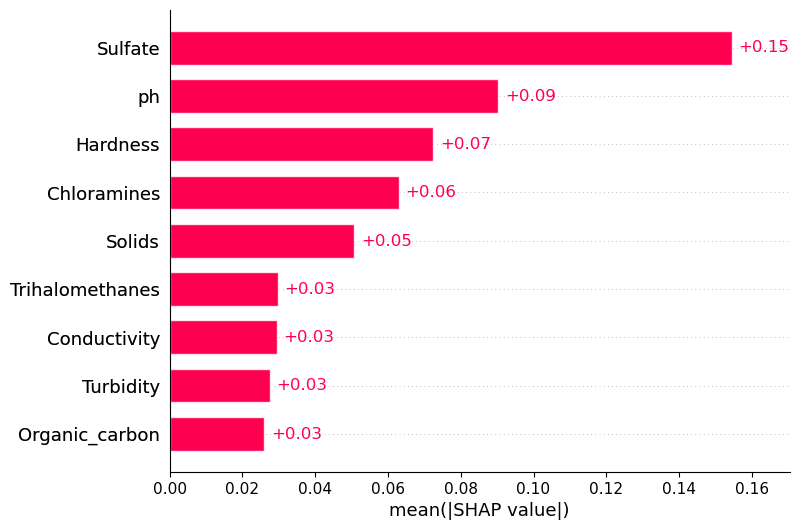

In [28]:
shap.plots.bar(shap_values)

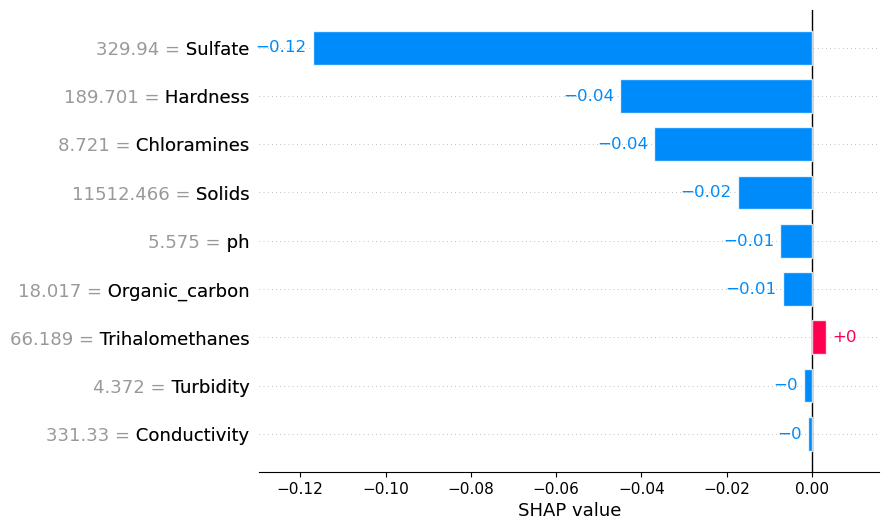

In [29]:
shap.plots.bar(shap_values[0])

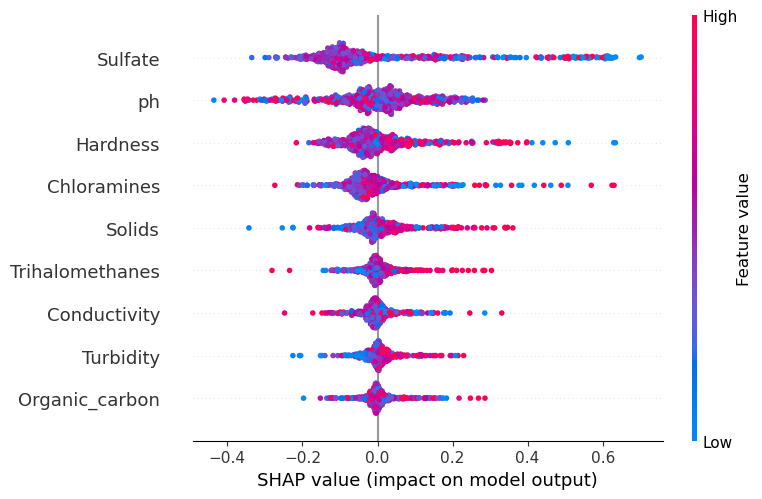

In [30]:
shap.summary_plot(shap_values, Xtest)

###  prediction’s explanation

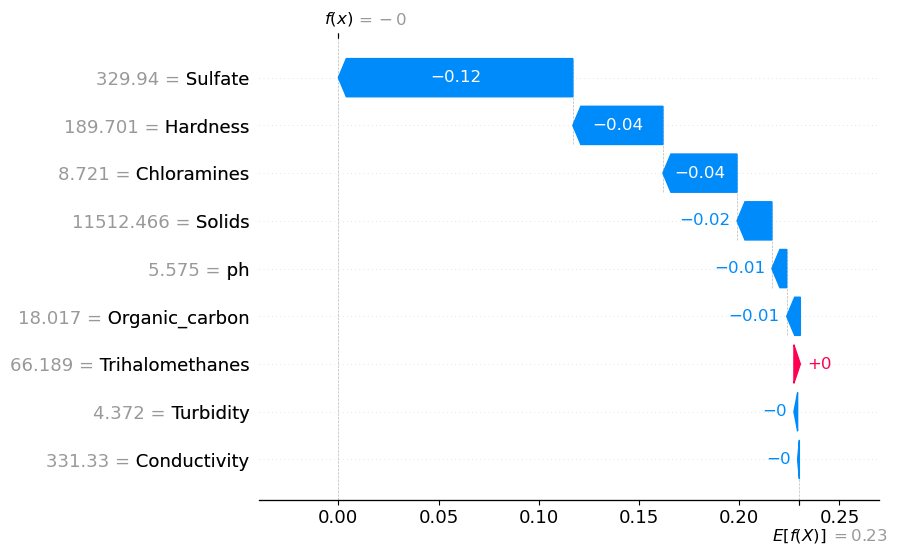

In [31]:
shap.plots.waterfall(shap_values[0])

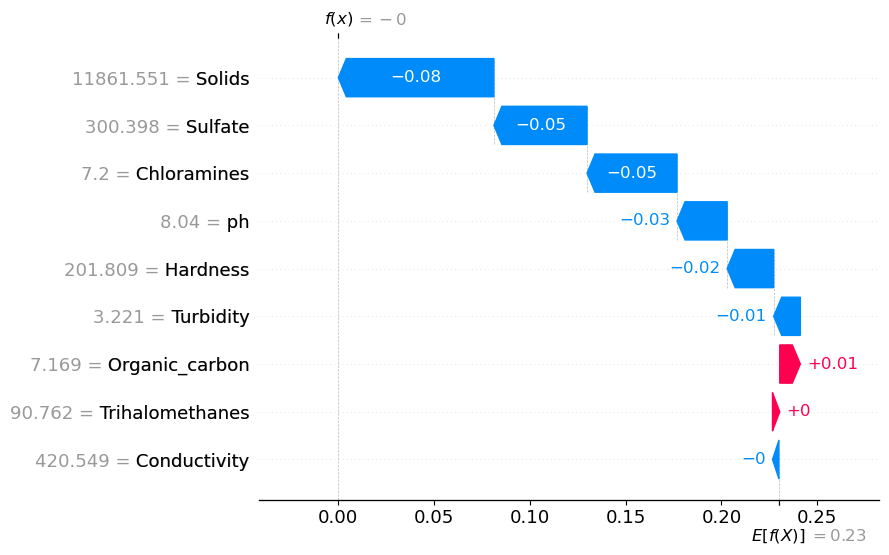

In [32]:
shap.plots.waterfall(shap_values[1])

### SHAP Dependence Scatter Plot

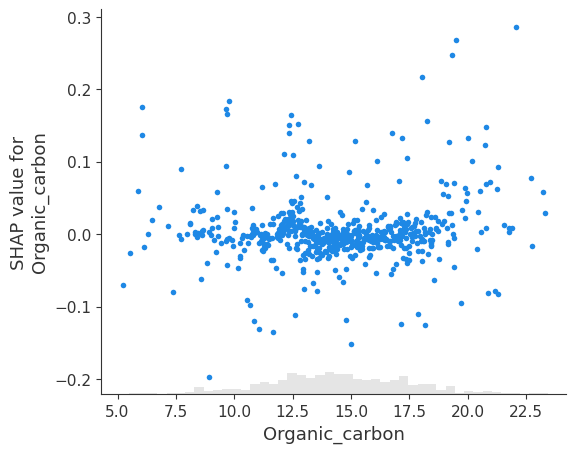

In [34]:
shap.plots.scatter(shap_values[:, "Organic_carbon"])